<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span><ul class="toc-item"><li><span><a href="#method" data-toc-modified-id="method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>method</a></span></li></ul></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Relabeling-genome-phylogeny" data-toc-modified-id="Relabeling-genome-phylogeny-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Relabeling genome phylogeny</a></span></li></ul></li><li><span><a href="#concenTRAIT" data-toc-modified-id="concenTRAIT-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>concenTRAIT</a></span><ul class="toc-item"><li><span><a href="#Majority-votes" data-toc-modified-id="Majority-votes-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Majority votes</a></span><ul class="toc-item"><li><span><a href="#CMD" data-toc-modified-id="CMD-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>CMD</a></span><ul class="toc-item"><li><span><a href="#Debug" data-toc-modified-id="Debug-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>Debug</a></span></li><li><span><a href="#Real-run" data-toc-modified-id="Real-run-5.1.1.2"><span class="toc-item-num">5.1.1.2&nbsp;&nbsp;</span>Real run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* `concenTRAIT` analysis of all traitar phenotypes

## method

We assessed trait conservatism of all inferred traits with consenTRAIT (Martiny, Treseder and Pusch, 2013), which calculates a metric of clade depth that each trait is conserved (Tau D). Traits were coded as binary presence/absence. Significance of conservation was assessed relative to a permuted null model in which traits were randomly shuffled across the phylogeny. 

# Var

In [3]:
work_dir = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT/'

# genome phylogeny
gen_phy_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/phylogeny/ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont.nwk'

# traitar phenotypes
## majority votes
trt_maj_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/predictions_flat_majority-votes_combined.tsv.gz'
## single votes
trt_sin_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/predictions_flat_single-votes_combined.tsv.gz'

# GTDBr89 genome metadata
meta_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/metadata_1per-GTDB-Spec_gte50comp-lt5cont_wtaxID_wPath.tsv'

# params
threads = 16

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ape)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [6]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT/ 


# Load

In [9]:
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
meta = Fread(meta_file) %>%
    dt_select(ncbi_genbank_assembly_accession, accession, ncbi_organism_name, gtdb_taxonomy) %>%
    dt_rename('GTDB_accession' = accession) %>%
    dt_separate(gtdb_taxonomy, tax_levs, sep=';') 

meta %>% unique_n('NCBI accessions', ncbi_genbank_assembly_accession)
meta

No. of unique NCBI accessions: 23360 


ncbi_genbank_assembly_accession,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,GB_GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,GB_GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806 sp001775395
GCA_002791595.1,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


In [10]:
gen_phy = read.tree(gen_phy_file)
gen_phy


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
	RS_GCF_000296615.1, RS_GCF_000337335.1, RS_GCF_002355655.1, RS_GCF_001280455.1, RS_GCF_000337035.1, RS_GCF_002114285.1, ...
Node labels:
	100.0, d__Archaea100.0, 97.0, 99.0, 100.0, 100.0:p__Halobacterota, ...

Rooted; includes branch lengths.

In [11]:
cmd = glue::glue('gunzip -c {file}', file=trt_maj_file)
trt_maj_votes = Fread(cmd=cmd) %>%
    dt_right_join(meta %>% dt_rename('sample'=ncbi_genbank_assembly_accession), 
                  by=c('sample'))
trt_maj_votes

sample,phenotype,prediction,phenotype_model,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,NA,NA,NA,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,NA,NA,NA,GB_GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_002791595.1,Yellow pigment,0,phypat,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595
GCA_002791595.1,Yellow pigment,0,phypat+PGL,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


In [12]:
cmd = glue::glue('gunzip -c {file}', file=trt_sin_file)
trt_sin_votes = Fread(cmd=cmd) %>%
    dt_right_join(meta %>% dt_rename('sample'=ncbi_genbank_assembly_accession), 
                  by=c('sample'))
trt_sin_votes

sample,phenotype,prediction,phenotype_model,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,Bacillus or coccobacillus,1,phypat,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_002789635.1,Bacillus or coccobacillus,1,phypat+PGL,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_002791595.1,Voges Proskauer,0,phypat,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595
GCA_002791595.1,Voges Proskauer,0,phypat+PGL,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


## Relabeling genome phylogeny

* replacing `GTDB_accession` with `NCBI_accession`

In [13]:
tmp = meta %>%
    as.data.frame
rownames(tmp) = tmp$GTDB_accession

gen_phy$tip.label = tmp[gen_phy$tip.label,]$ncbi_genbank_assembly_accession

rm(tmp);gc()
gen_phy

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,915541,48.9,2579715,137.8,1657277,88.6
Vcells,89944331,686.3,147930400,1128.7,129842627,990.7



Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
	GCA_000296615.1, GCA_000337335.1, GCA_002355655.1, GCA_001280455.1, GCA_000337035.1, GCA_002114285.1, ...
Node labels:
	100.0, d__Archaea100.0, 97.0, 99.0, 100.0, 100.0:p__Halobacterota, ...

Rooted; includes branch lengths.

In [14]:
tree_rn_file = file.path(work_dir, 'ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk')
write.tree(gen_phy, file=tree_rn_file)
cat('File written:', tree_rn_file, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk 


# concenTRAIT

## Majority votes

In [15]:
# formatting into `genome x sample` matrix
trt_maj_votes_m = trt_maj_votes %>%
    dt_mutate(phenotype_model = ifelse(is.na(phenotype_model), 'phypat+PGL', phenotype_model)) %>%
    dt_filter(phenotype_model == 'phypat+PGL') %>%
    dt_mutate(phenotype = ifelse(is.na(phenotype), 'None', phenotype),
              prediction = ifelse(is.na(prediction), 1, prediction)) %>%
    dt_select(sample, phenotype, prediction) %>%
    as_tibble %>%
    spread(phenotype, prediction, fill=0) %>%
    as.data.frame

trt_maj_votes_m

sample,Acetate utilization,Aerobe,Alkaline phosphatase,Anaerobe,Arginine dihydrolase,Bacillus or coccobacillus,Beta hemolysis,Bile-susceptible,Capnophilic,⋯,Raffinose,Salicin,Spore formation,Starch hydrolysis,Sucrose,Tartrate utilization,Trehalose,Urea hydrolysis,Voges Proskauer,Yellow pigment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GCA_000005825.2,1,1,1,0,0,1,0,1,0,⋯,0,0,1,1,1,0,1,0,0,0
GCA_000006175.2,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_900489835.1,0,1,1,0,1,1,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
GCA_900489925.1,1,1,1,0,1,1,0,1,0,⋯,0,0,0,0,0,0,1,1,0,0


In [16]:
# writing out table
trait_file = file.path(work_dir, 'predictions_flat_majority-votes_combined.tsv')
write_table(trt_maj_votes_m, file=trait_file)

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//predictions_flat_majority-votes_combined.tsv 


### CMD

In [17]:
setwd(work_dir)
conda_env = '/ebio/abt3_projects/Georg_animal_feces/envs/consenTRAIT'
exe = '/ebio/abt3_projects/small_projects/nyoungblut/code/consenTRAIT/consenTRAIT.r'

#### Debug

In [101]:
# creating test data
cmd = glue::glue('Rscript {exe} -b {boots} -p {threads} -x 100 TEST TEST TEST',
                 exe = exe, boots = 10, threads = 4)
print(cmd)
bash_job(cmd, conda_env=conda_env, stdout=TRUE)

Rscript /ebio/abt3_projects/small_projects/nyoungblut/code/consenTRAIT/consenTRAIT.r -b 10 -p 4 -x 100 TEST TEST TEST


Warning message in system2("bash", cmd, stdout = stdout, stderr = stderr):
“running command ''bash' -c ". ~/.bashrc; conda activate /ebio/abt3_projects/Georg_animal_feces/envs/consenTRAIT; Rscript /ebio/abt3_projects/small_projects/nyoungblut/code/consenTRAIT/consenTRAIT.r -b 10 -p 4 -x 100 TEST TEST TEST" 2>&1' had status 1”


Test files written: 
  consentrait_TEST.nwk
  consentrait_TEST.txt
  consentrait_TEST_trait1.pdf
  consentrait_TEST_trait2.pdf
Execution halted

NULL

In [106]:
# running concentrait
cmd = glue::glue('Rscript {exe} -b {boots} -p {threads} {tree} {root} {trait} > {out}',
                 exe = exe, boots = 10, threads = 4,
                 tree = 'consentrait_TEST.nwk', root = 't1',
                 trait = 'consentrait_TEST.txt', out = 'consentrait_TEST_out.txt')
print(cmd)
bash_job(cmd, conda_env=conda_env)

Rscript /ebio/abt3_projects/small_projects/nyoungblut/code/consenTRAIT/consenTRAIT.r -b 10 -p 4 consentrait_TEST.nwk t1 consentrait_TEST.txt > consentrait_TEST_out.txt
Analyzing tree:  1 
  Analyzing trait:  1 
  Analyzing trait:  2 
Bootstrapping in parallel

NULL

In [18]:
# results
ct = read.delim('consentrait_TEST_out.txt', sep='\t', skip=1)
ct

Trait,tau_D,p.value
<fct>,<dbl>,<dbl>
t1,0.01527473,1.0
t2,0.01378934,0.7


#### Real run

In [20]:
# running concentrait
ct_out_F = file.path(work_dir, 'predictions_flat_majority-votes_combined_CT.txt')
cmd = glue::glue('Rscript {exe} -b {boots} -p {threads} {tree} {root} {trait} > {out}',
                 exe = exe, tree = tree_rn_file, trait = trait_file, out = ct_out_F, 
                 root = 'GCA_001784635.1', boots = 100, threads = 24)
cmd

Rscript /ebio/abt3_projects/small_projects/nyoungblut/code/consenTRAIT/consenTRAIT.r -b 100 -p 24 /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk GCA_001784635.1 /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//predictions_flat_majority-votes_combined.tsv > /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//predictions_flat_majority-votes_combined_CT.txt

In [113]:
bash_job(cmd, conda_env=conda_env, stdout=TRUE)

Warning message in system2("bash", cmd, stdout = stdout, stderr = stderr):
“running command ''bash' -c ". ~/.bashrc; conda activate /ebio/abt3_projects/Georg_animal_feces/envs/consenTRAIT; Rscript /ebio/abt3_projects/small_projects/nyoungblut/code/consenTRAIT/consenTRAIT.r -b 3 -p 12 /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk GCA_001784635.1 /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//predictions_flat_majority-votes_combined.tsv > /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/consenTRAIT//predictions_flat_majority-votes_combined_CT.txt" 2>&1' had status 1”


Analyzing tree:  1 
  Analyzing trait:  1 
Error in if (mean(table2[tip_names][, Trait]) > perc.share.cutoff) { : 
  missing value where TRUE/FALSE needed
Calls: cons.trait
In addition: Warning message:
In mean.default(table2[tip_names][, Trait]) :
  argument is not numeric or logical: returning NA
Execution halted

NULL

##### Notes

* Ran the script from the command line 

### Summary

In [21]:
# loading results
ct = read.delim(ct_out_F, sep='\t')
ct

Trait,tau_D,p.value
<fct>,<dbl>,<dbl>
t1,0.04776272,0
t2,0.07997725,1
⋮,⋮,⋮
t67,0.05330260,0.98
t68,0.02717572,0.00


In [22]:
# relabeling traits
tmp = read.delim(trait_file, sep='\t') %>%
    gather(trait, value, -sample) %>%
    distinct(trait) %>%
    mutate(Trait = gsub('^', 't', 1:length(trait)))

ct = ct %>%
    inner_join(tmp, c('Trait')) 
ct

Warning message:
“Column `Trait` joining factor and character vector, coercing into character vector”


Trait,tau_D,p.value,trait
<chr>,<dbl>,<dbl>,<chr>
t1,0.04776272,0,Acetate.utilization
t2,0.07997725,1,Aerobe
⋮,⋮,⋮,⋮
t67,0.05330260,0.98,Voges.Proskauer
t68,0.02717572,0.00,Yellow.pigment


In [23]:
# pvalue distribution
ct$p.value %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.4450  0.4981  1.0000  1.0000 

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/consenTRAIT/.figures/080a60929846a211f2f3fd0eefb520bb.RDS 


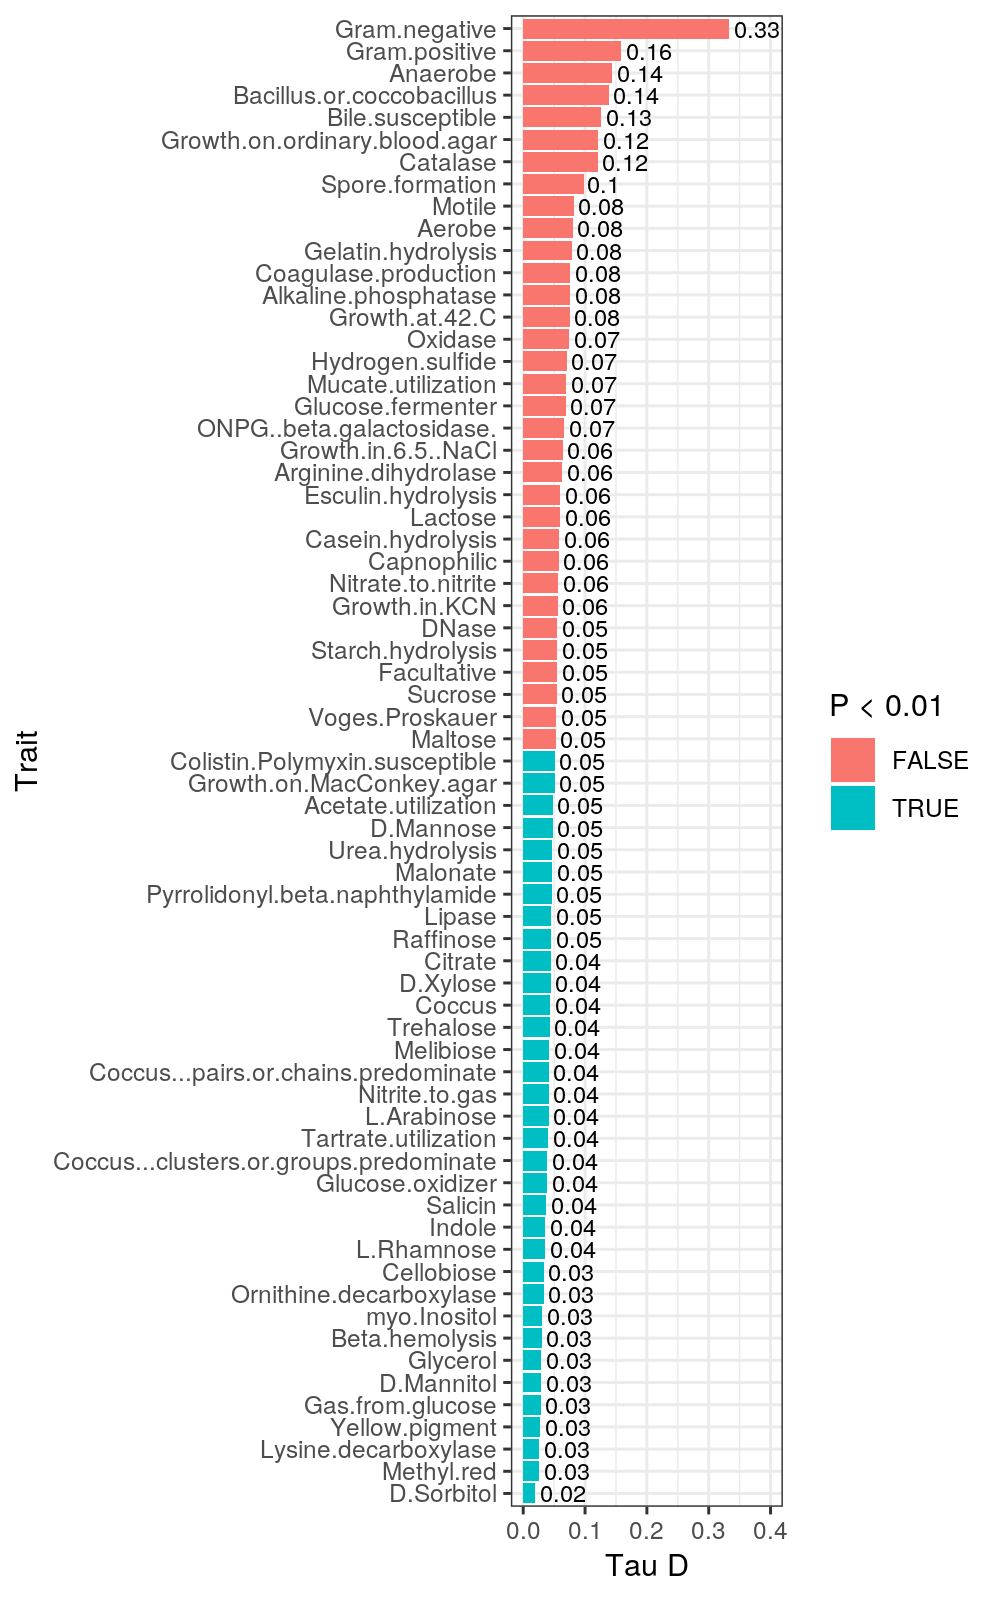

In [29]:
# plotting
p = ct %>%
    filter(trait != 'None') %>%
    mutate(sig = p.value < 0.01,
           trait = trait %>% reorder(tau_D)) %>%
    ggplot(aes(trait, tau_D, fill=sig)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=round(tau_D, 2)), hjust=-0.1, size=3) +
    scale_y_continuous(limits=c(0, 0.4)) +
    scale_fill_discrete('P < 0.01') +
    labs(x='Trait', y='Tau D') +
    theme_bw() +
    coord_flip()

p.dims(5,8)
Plot(p)

##### Notes

* tauD = trait depth on the phylogeny
* p-value =  non-parametric estimate for significant clustering

# sessionInfo

In [152]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] data.table_1.12.8 LeyLabRMisc_0.1.1 ape_5.3           ggplot2_3.2.1    
[5] tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3        pillar_1.4.3      compiler_3.6.2    iterators_1.0.12 
 [5] base64enc_0.1-3   tools_3.6.2       zeall